In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

plt.style.use("ggplot")  #using style ggplot
#%matplotlib inline
#import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay

# Extracting The Data

In [40]:
df = pd.read_csv('heart.csv')

# Analysis

In [41]:
df.shape

(303, 14)

### We have 303 rows and 14 coumns

In [42]:
df.describe().style.background_gradient(cmap = 'hot')

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [43]:
df.nunique().sort_values()

sex           2
fbs           2
exng          2
output        2
restecg       3
slp           3
cp            4
thall         4
caa           5
oldpeak      40
age          41
trtbps       49
thalachh     91
chol        152
dtype: int64

In [44]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [45]:
#df.groupby('chol')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

In [46]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<AxesSubplot:title={'center':'Male & Female have heart attack'}, ylabel='output'>

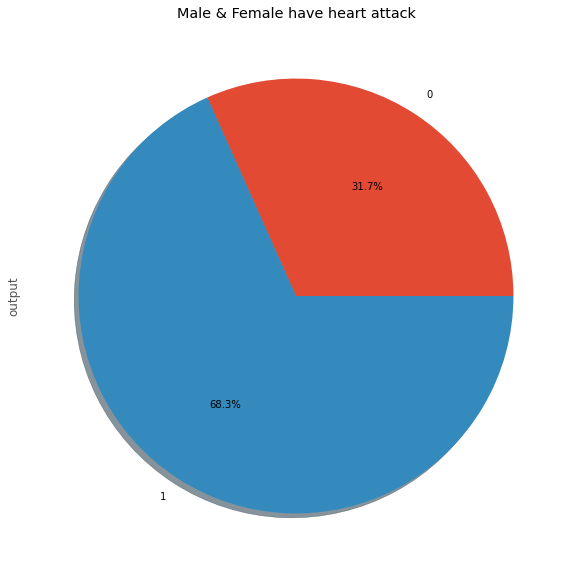

In [47]:
df.groupby('sex')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="Male & Female have heart attack")

### Gender Of Patient

#### MALE : 0 
#### FEMALE : 1

<AxesSubplot:title={'center':'fasting blood sugar'}, ylabel='output'>

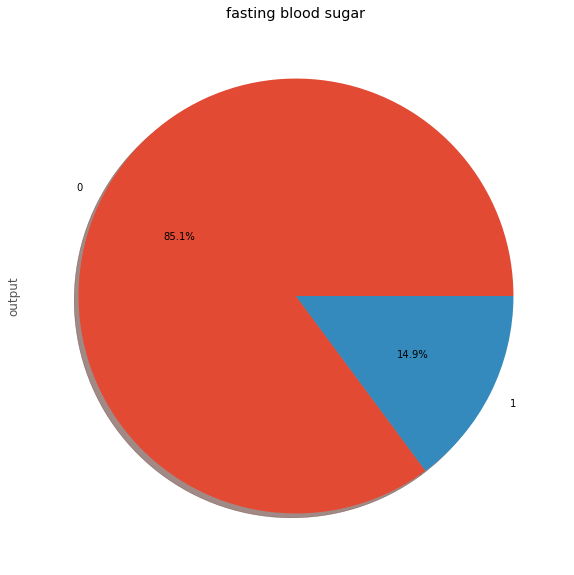

In [48]:
df.groupby('fbs')["output"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(10,10),title="fasting blood sugar")

###### Approximately 15% of people are having fasting blood sugar greater than 120mg/dl   

<AxesSubplot:xlabel='age', ylabel='chol'>

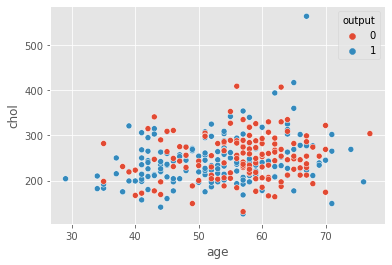

In [49]:
sns.scatterplot(x="age",y="chol",data=df,hue="output")

In [50]:
#numeric_var = ["age", "trtbps", "chol", "oldpeak"]
#graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
#graph.map_lower(sns.kdeplot, levels = 4, color = ".2")
#plt.show()

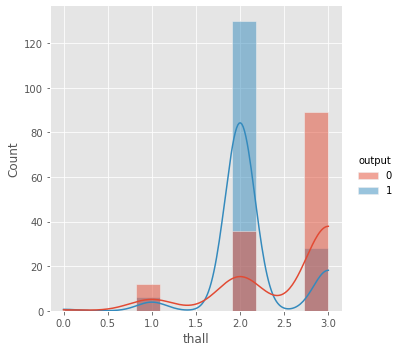

In [51]:
sns.displot(x = "thall", data=df, hue="output",kde=True)#Thall:maximum heart rate achieved 

### whose patients whose have 2nd type thall have high chances  of Heart Attack

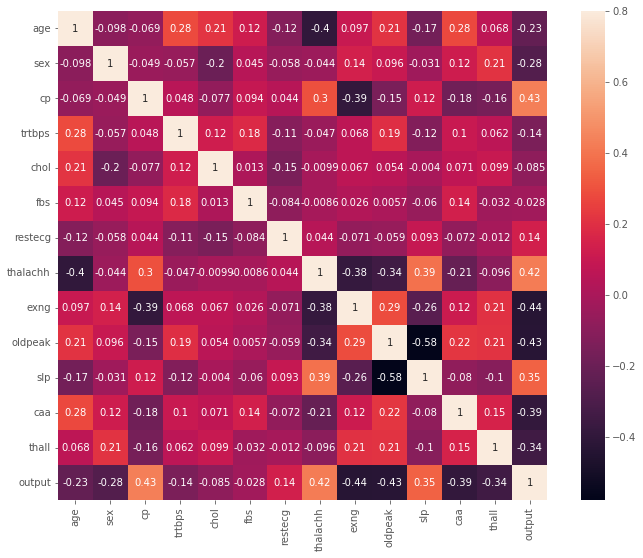

In [52]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

### OldPeak(ST depression induced by exercise relative to rest) and thall ( Thalassemia ) have the most correlation with target ( diagnosis of heart disease)

# PreProcessing

In [53]:
X = df.iloc[: , 0:-1 ]
Y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25 ,random_state=8)

sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.transform(X_train)

# Implementing Classsifer

## KNN


In [54]:
myKNN = KNeighborsClassifier(n_neighbors = 1)
model = myKNN.fit(X_train, y_train)
y_predict = myKNN.predict(X_test)

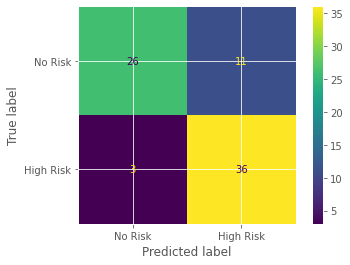

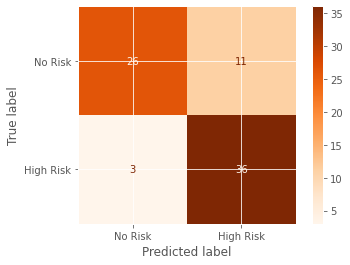

In [55]:
#print(confusion_matrix(y_test,y_predict))
cm = confusion_matrix(y_predict,y_test, labels=model.classes_)
disp=ConfusionMatrixDisplay(cm,display_labels =['No Risk','High Risk']).plot()
disp.plot(include_values=True, cmap='Oranges', xticks_rotation='horizontal')
plt.show()

In [56]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.92      0.77      0.84        47

    accuracy                           0.82        76
   macro avg       0.81      0.83      0.81        76
weighted avg       0.84      0.82      0.82        76



## Decision Tree

In [57]:
dtree = DecisionTreeClassifier()
model=dtree.fit(X_train, y_train)
y_predict = dtree.predict(X_test)

In [58]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           0       0.58      0.72      0.65        29
           1       0.80      0.68      0.74        47

    accuracy                           0.70        76
   macro avg       0.69      0.70      0.69        76
weighted avg       0.72      0.70      0.70        76



In [59]:
print(confusion_matrix(y_test, y_predict))

[[21  8]
 [15 32]]


## Random Forest

In [60]:
rforest = RandomForestClassifier(n_estimators = 300)
rforest.fit(X_train, y_train)
y_predict2 = rforest.predict(X_test)


In [61]:
print(confusion_matrix(y_test,y_predict2))

[[27  2]
 [10 37]]


In [62]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.95      0.79      0.86        47

    accuracy                           0.84        76
   macro avg       0.84      0.86      0.84        76
weighted avg       0.87      0.84      0.84        76



## Naive Bayes

In [63]:
model = GaussianNB()
model.fit(X_test,y_test)
y_predict3 = model.predict(X_test)


In [64]:
print(confusion_matrix(y_test, y_predict3))

[[25  4]
 [ 4 43]]


In [65]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.91      0.91      0.91        47

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



## Logistic Regression

In [66]:
clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [67]:
print(confusion_matrix(y_test, predictions))

[[26  3]
 [ 9 38]]


In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.93      0.81      0.86        47

    accuracy                           0.84        76
   macro avg       0.83      0.85      0.84        76
weighted avg       0.86      0.84      0.84        76



## Comparison

In [69]:
LIR= LinearRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
model = GaussianNB()
#LogisticRegression(solver='lbfgs', max_iter=300 )

In [70]:
from sklearn.metrics import accuracy_score
li = [DTR,RFR,KNR,model]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

DecisionTreeClassifier() : 67.10526315789474
RandomForestClassifier() : 84.21052631578947
KNeighborsClassifier() : 84.21052631578947
GaussianNB() : 81.57894736842105


###  Random forest Classifier() has given the best accuracy result.

### Accuracy vs  Classifier

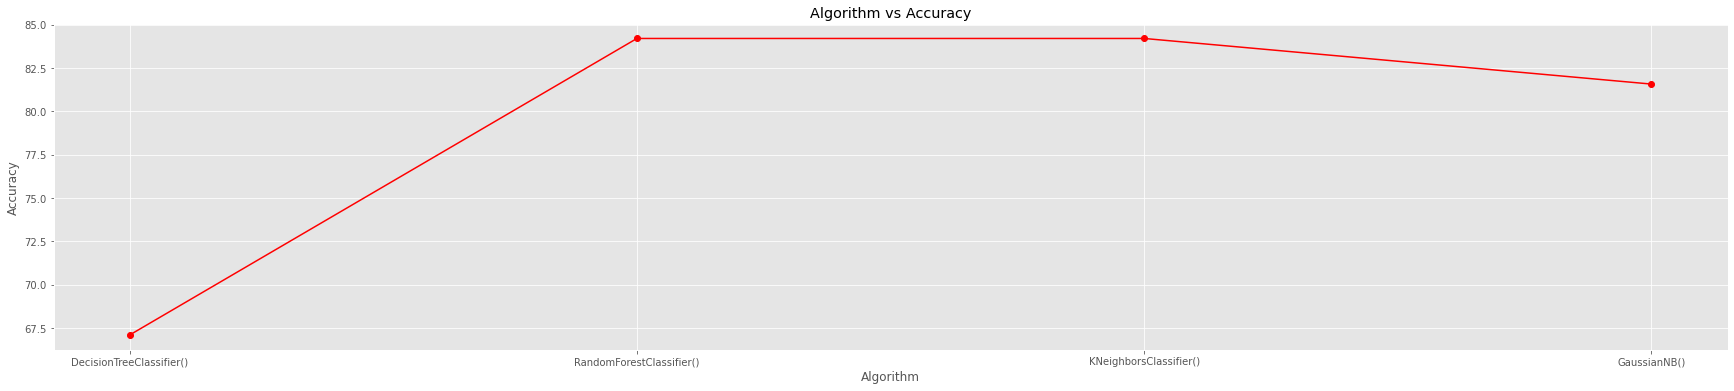

In [71]:
plt.figure(figsize=(30, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()